<a href="https://colab.research.google.com/github/ClaireCooper/cjc233_ads_2024/blob/main/notebooks/03_address_glm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical 3

### [Carl Henrik Ek](http://carlhenrik.com), University of Cambridge

### [Radzim Sendyka](https://www.cst.cam.ac.uk/people/rs2071), University

of Cambridge

### [Christian Cabrera](https://www.cst.cam.ac.uk/people/chc79), University

of Cambridge

### [Neil D. Lawrence](http://inverseprobability.com), University of

Cambridge

### 2024-11-18

**Abstract**: In this worksheet we will look at a general framework for
formulating linear models.

$$
$$

::: {.cell .markdown}

<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!---->
<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!-- The last names to be defined. Should be defined entirely in terms of macros from above-->
<!--

-->

The check Session for this Practical is 21st November 2024

Prerequisite: Practical 1, Practical 2

In this worksheet we will look at linear models. We will show a general
framework for formulating models where we have a set of response
variables that we want to explain through a linear relationship from a
set of explanatory variables. While many relationships are non-linear in
nature it is often challenging to interpret and explain the results from
non-linear models. Therefore, linear models remains very important as
they provide a nice trade-off between explanation of the data while at
the same time providing interpretable semantics.

## Generalised Linear Models

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_address/includes/Generalised_Linear_Models.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_address/includes/Generalised_Linear_Models.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

We have a set of explanatory variables $x \in X$ and a set of response
variables $y \in Y$. The data is provided to us in pairs
$D = \{x_i, y_i\}_N$ where $x_i$ and $y_i$ are in correspondence. Our
aim is to build a model that allows us to predict the response variable
$y_i$ from its corresponding explanatory variable $x_i$.

Linear regression makes the assumption that the relationship between the
response variable and the explanatory variable can be written as a
linear combination. Furthermore, it assumes that the observations of the
response variable have been corrupted by an additive Gaussian noise
process,

$$ y_i = \sum_{i=1}^{d} \beta_i x_{id} + E, $$

where $E \sim \mathcal{N}(0, \sigma^2)$.

While both the explanatory and response variable are deterministic, due
to the noise corrupting the observations, our predictions under the
model are random. In order to extract a point estimate we therefore take
the expected value,

$$ \mathbb{E}[y_i | x_i] = \mathbb{E} \left( \sum_{i=1}^{d} \beta_i x_{id} + E \right), $$

$$ = \sum_{i=1}^{d} \beta_i x_{id} + \mathbb{E}[E], $$

$$ = \sum_{i=1}^{d} \beta_i x_{id} + 0. $$

Traditionally the linear regression model above is motivated by an
additive noise assumption that corrupts the observed response. An
equivalent explanation is to absorb the noise directly into the response
variable and consider it a linear model of a normal distributed
response,

$$ y_i = \sum_{i=1}^{d} \beta_i x_{id} + \varepsilon, $$

$$ y_i + \varepsilon = \sum_{i=1}^{d} \beta_i x_{id}, $$

$$ \hat{y}_i = \sum_{i=1}^{d} \beta_i x_{id}, $$

$$ \hat{y}_i \sim \mathcal{N} \left( y_i, \sigma^2 \right) = \mathcal{N} \left( \sum_{i=1}^{d} \beta_i x_{id}, \sigma^2 \right), $$

where, as we previously derived, the linear predictor directly
parametrises the mean or the first moment of the random response
variable.

If we want to generalise the setting, we can think of scenarios where
the response variable follows a different distribution. This could be a
Bernoulli distributed response, as in binary classification, or Poisson
distributed if we are describing discrete events. Specifically, we will
look at models where the first moment of the response variable can be
parametrised as a function of a linear combination of the explanatory
variables,

$$ g(\mathbb{E}[y_i | x_i]) = \sum_{i=1}^{d} \beta_i x_{id}, $$

where the function $g(\cdot)$ is known as a link function, connecting
the expected value and the linear predictor (for the linear regression
case above the link function is the identity).

While the above formulation is the one that is most commonly used in the
statistics literature, in a machine learning setting we can think of a
transformation of a linear mapping as

$$ \mathbb{E}[y_i | x_i] = g^{-1} \left( \sum_{i=1}^{d} \beta_i x_{id} \right), $$

If you are familiar with simple compositional function models, such as
neural networks, you can see how these are recursive formulations of
similar structures. An article that describes neural networks in the
light of the models we will describe can be found
[here](https://towardsdatascience.com/glms-part-iii-deep-neural-networks-as-recursive-generalized-linear-URL).

The class of models that can be described using the equations above are
commonly referred to as Generalised Linear Models (GLM) (McCullagh et
al., 1989), where the generalisation comes from the fact that we
consider the response variable to follow an Exponential Dispersion
Family distribution
([wiki](https://en.wikipedia.org/wiki/Exponential_dispersion_model)).
This family is a rich class of probability distributions that contains
most of the distributions you may be familiar with. Each distribution is
defined through two parameters: the location parameter and a scale
parameter. The link function plays the role of “linking” the value of
the linear predictor to the location parameter of the distribution.

Many classical statistical models can be written in the language of
generalised linear models. Below, a list of models that fall into this
category is shown
([source](https://online.stat.psu.edu/stat504/lesson/6/6.1)). Each model
is characterised by three different components: an exponential
dispersion family distribution of the response, a link function, and a
linear predictor from the explanatory variables.

| Model                | Response Variable | Link              | Explanatory Variable |
|:-----------------|:----------------|:----------------|:------------------|
| Linear Regression    | Normal            | Identity          | Continuous           |
| Logistic Regression  | Binomial          | Logit             | Mixed                |
| Poisson Regression   | Poisson           | Log               | Mixed                |
| ANOVA                | Normal            | Identity          | Categorical          |
| ANCOVA               | Normal            | Identity          | Mixed                |
| Loglinear            | Poisson           | Log               | Categorical          |
| Multinomial Response | Multinomial       | Generalized Logit | Mixed                |

The exponential dispersion family can be written in the following
canonical form,

$$ f(y; \theta, \phi) = \exp \left( \frac{\theta y - b(\theta)}{a(\phi)} + c(y, \phi) \right), $$

where $\theta$ is the location and $\phi$ the scale parameter,
respectively. A special instantiation of this is the Gaussian
distribution,

$$ f(y; \mu, \sigma^2) = \exp \left( \frac{\mu y - \frac{1}{2} \mu^2}{\sigma^2} - \frac{y^2}{2\sigma^2} - \frac{1}{2} \ln(2\pi\sigma^2) \right),$$

where we can identify,

$$ \theta = \mu, $$

$$ \phi = \sigma^2, $$

$$ b(\theta) = \frac{1}{2} \theta^2, $$

$$ a(\phi) = \sigma^2, $$

$$ c(y, \phi) = \frac{y^2}{2\phi} - \frac{1}{2} \ln(2\pi\phi). $$

The benefit of writing the distribution in this general form is that we
can easily derive a general expression for both the first and the second
moments of the predictive distribution,

$$ \mathbb{E}[y | x] = \frac{\partial}{\partial \theta} b(\theta), $$

$$ \mathbb{V}[y | x] = a(\phi) \frac{\partial^2}{\partial \theta^2} b(\theta). $$

This means that given a GLM, we can compute predictions and our
uncertainty about those predictions in closed form. We will now proceed
to look at how we can fit these models to data and learn the parameters
$\beta$ that connect the explanatory variables with the response.

## Learning Generalised Linear Models

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_address/includes/Learning_Generalised_Linear_Models.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_address/includes/Learning_Generalised_Linear_Models.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Fitting the GLM models described above to data implies learning the
parameters $\beta$ of the linear predictor. We will do so by finding the
maximum likelihood estimate. By specifying the distribution of the
response variable, we have in effect specified a likelihood of each
individual data-point. To reach the joint likelihood of each response
variable, we will make the assumption that each observed response is
conditionally independent given the parameters and the explanatory
variables. This leads to the following objective function,

$$ \hat{\beta} = \arg \max_{\beta} \prod_{i=1}^{N} p(y_i | x_i, \beta). $$

GLM models are very well studied in the literature, and many different
highly efficient approaches exist for fitting the parameters to data.
While this is an interesting topic in itself, it is beyond the scope of
this course. Instead, we will put our trust in the very well-documented
library [Statsmodels](https://www.statsmodels.org) rather than
implementing this ourselves. Below, the code for implementing two
separate GLM models is shown. The data is count data, and the most
suitable model would be a Poisson regression model for this type. In
addition, we also include a standard Gaussian linear model with a single
parameter parametrising the slope of the line. The output figure will
show the output of fitting a Poisson regression model in red and the
Gaussian model in cyan. The dotted lines shows the 95% confidence
interval for the **parameters** of the fit. We should see the fit is
(not surprisingly) much worse for the Gaussian model compared to the
Poisson.

In [ ]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

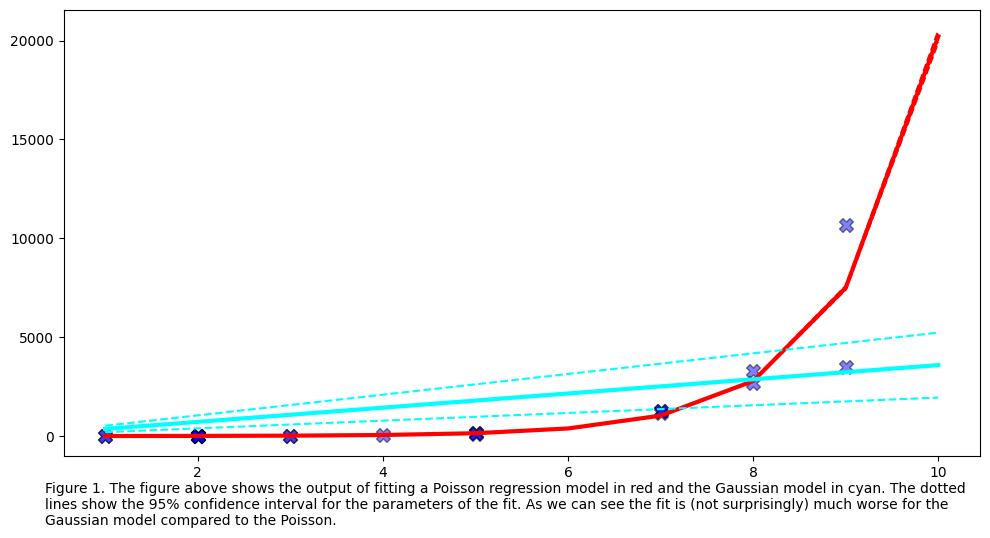

In [ ]:
# generate data
x = np.array([[i] for i in np.random.choice(range(1,10), 20)])
y = np.array([np.exp(i) + np.random.normal(0,0.25*np.exp(i),1)[0] for i in x])

# make sure that the values are positive
y[y<0] = 0

# create models
m_poisson = sm.GLM(y,x, family=sm.families.Poisson())
m_poisson_results = m_poisson.fit()

m_gaussian = sm.GLM(y,x, family=sm.families.Gaussian())
m_gaussian_results = m_gaussian.fit()

# prediction
x_pred = np.arange(1,11).reshape(-1,1)
y_pred = m_poisson_results.get_prediction(x_pred).summary_frame(alpha=0.05)

y_pred_gaussian = m_gaussian_results.get_prediction(x_pred).summary_frame(alpha=0.05)

# plot results
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

plt.scatter(x,y,marker='X',color='blue',edgecolor='black',s=100,alpha=0.5,zorder=1)

plt.plot(x_pred,y_pred['mean'],color='red',linewidth=3.0,zorder=2)
plt.plot(x_pred,y_pred['mean_ci_lower'], color='red',linestyle='--',zorder=2)
plt.plot(x_pred,y_pred['mean_ci_upper'], color='red',linestyle='--',zorder=2)

plt.plot(x_pred,y_pred_gaussian['mean'],color='cyan',linewidth=3.0,zorder=2)
plt.plot(x_pred,y_pred_gaussian['mean_ci_lower'], color='cyan',linestyle='--',zorder=2)
plt.plot(x_pred,y_pred_gaussian['mean_ci_upper'], color='cyan',linestyle='--',zorder=2)

fig.text(.05, -.06, "Figure 1. The figure above shows the output of fitting a Poisson regression model in red and the Gaussian model in cyan. The dotted\nlines show the 95% confidence interval for the parameters of the fit. As we can see the fit is (not surprisingly) much worse for the\nGaussian model compared to the Poisson.")

plt.tight_layout()

The important part of the code above is the
`m_poisson = sm.GLM(y,x, family=sm.families.Poisson())` call where we
specify the distribution of the of the response variable. Statsmodels
currently implements the following distributions, Binomial, Gamma,
Gaussian, InverseGaussian, NegativeBinomial, Poisson, Tweedie which
should give you a rich playground of models to work with.

## Basis-function Models

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_address/includes/Basis_Function_Models.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_address/includes/Basis_Function_Models.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In the framework we have described above, the linear prediction is
directly on the explanatory variables. However, we can generalise this
slightly if we instead want to perform the regression over a set of
basis functions. In statistics, we often refer to the matrix of the
explanatory variables as the design matrix of the data. We can easily
“design” a matrix that maps the explanatory variables to a “feature
space” and then perform the regression over this domain instead.

In Figure 1, the cyan plot uses only a single parameter in its
prediction and is therefore only able to parametrise lines that
intersect at $(0, 0)$. In order to also parametrise the intersection of
the line in the model, we require an expansion of the input domain with
a constant one, as follows:

$$
X =
\begin{bmatrix}
x_0 & 1 \\
x_1 & 1 \\
\vdots & \vdots \\
x_N & 1 \\
\end{bmatrix}
$$

Using the above as the explanatory variables, we will be able to fit
both the intersection and the slope. However, we can take this concept
further and generalise this to perform regression over a different
expanded explanatory space. Say that we know that the relationship
between the response and the explanatory variables is:

$$
y = \beta_0 \sin(x) + \beta_1 \sin\left(\frac{x^2}{40}\right) + \beta_2 x.
$$

We can now create a new design matrix that includes all the functions we
need and apply the GLM framework as before:

$$
\begin{bmatrix}
\sin(x_0) & \sin\left(\frac{x_0^2}{40}\right) & x_0 \\
\sin(x_1) & \sin\left(\frac{x_1^2}{40}\right) & x_1 \\
\vdots & \vdots & \vdots \\
\sin(x_N) & \sin\left(\frac{x_N^2}{40}\right) & x_N \\
\end{bmatrix}
$$

Below we will implement this using the `OLS` model which is just a
Gaussian response and an identity link function. The motivation for
using `OLS` rather than `GLM` is that the former provides easier means
of analysing predictions.

The resulting figure shows fitting a linear Gaussian model to a
non-linear function. The prediction in red shows the model where the
design matrix is directly on the explanatory variables while the cyan
uses a design matrix of non-linear functions.

In [ ]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

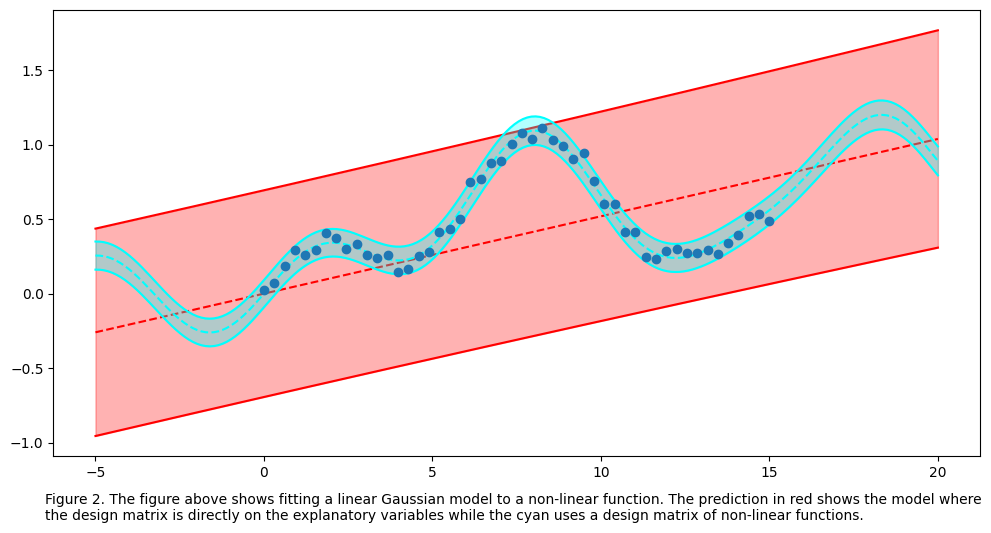

In [ ]:
np.random.seed(42)

# Generate data
x = np.linspace(0, 15, 50)
y = 0.2 * np.sin(x) + 0.5 * np.sin(x**2 / 40) + 0.05 * x
y += 0.05 * np.random.randn(x.shape[0])

# Fit a simple linear model
m_linear = sm.OLS(y, x)
results = m_linear.fit()

# Design matrix with basis functions
design = np.concatenate((np.sin(x).reshape(-1, 1), np.sin(x**2 / 40).reshape(-1, 1), x.reshape(-1, 1)), axis=1)
m_linear_basis = sm.OLS(y, design)
results_basis = m_linear_basis.fit()

# Predictions
x_pred = np.linspace(-5, 20, 200).reshape(-1, 1)
design_pred = np.concatenate((np.sin(x_pred), np.sin(x_pred**2 / 40), x_pred), axis=1)

y_pred_linear = results.get_prediction(x_pred).summary_frame(alpha=0.05)
y_pred_linear_basis = results_basis.get_prediction(design_pred).summary_frame(alpha=0.05)

# Plotting
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.scatter(x, y, zorder=2)

# Linear model predictions
ax.plot(x_pred, y_pred_linear['mean'], color='red', linestyle='--', zorder=1)
ax.plot(x_pred, y_pred_linear['obs_ci_lower'], color='red', linestyle='-', zorder=1)
ax.plot(x_pred, y_pred_linear['obs_ci_upper'], color='red', linestyle='-', zorder=1)
ax.fill_between(x_pred.flatten(), y_pred_linear['obs_ci_lower'], y_pred_linear['obs_ci_upper'], color='red', alpha=0.3, zorder=1)

# Basis model predictions
ax.plot(x_pred, y_pred_linear_basis['mean'], color='cyan', linestyle='--', zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_lower'], color='cyan', linestyle='-', zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_upper'], color='cyan', linestyle='-', zorder=1)
ax.fill_between(x_pred.flatten(), y_pred_linear_basis['obs_ci_lower'], y_pred_linear_basis['obs_ci_upper'], color='cyan', alpha=0.3, zorder=1)

fig.text(.05, -.05, "Figure 2. The figure above shows fitting a linear Gaussian model to a non-linear function. The prediction in red shows the model where\nthe design matrix is directly on the explanatory variables while the cyan uses a design matrix of non-linear functions.")

plt.tight_layout()
plt.show()

The figure above shows fitting a linear Gaussian model to a non-linear
function. The prediction in red shows the model where the design matrix
is directly on the explanatory variables while the cyan uses a design
matrix of non-linear functions.

In [ ]:
print(results_basis.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              2592.
Date:                Thu, 21 Nov 2024   Prob (F-statistic):                    3.49e-52
Time:                        16:05:54   Log-Likelihood:                          85.315
No. Observations:                  50   AIC:                                     -164.6
Df Residuals:                      47   BIC:                                     -158.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Furthermore, if we look at the log-likelihood of the two models we can
see that it is substantially higher for the second models compared to
the first. This indicates, as we can see visually, that the second
design matrix results in a much better fit to the data.

While the example above worked well maybe it felt a bit contrived as we
basically needed to know the function a-priori. So how about using a
design matrix with additional basis function $-np.sin(x)$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

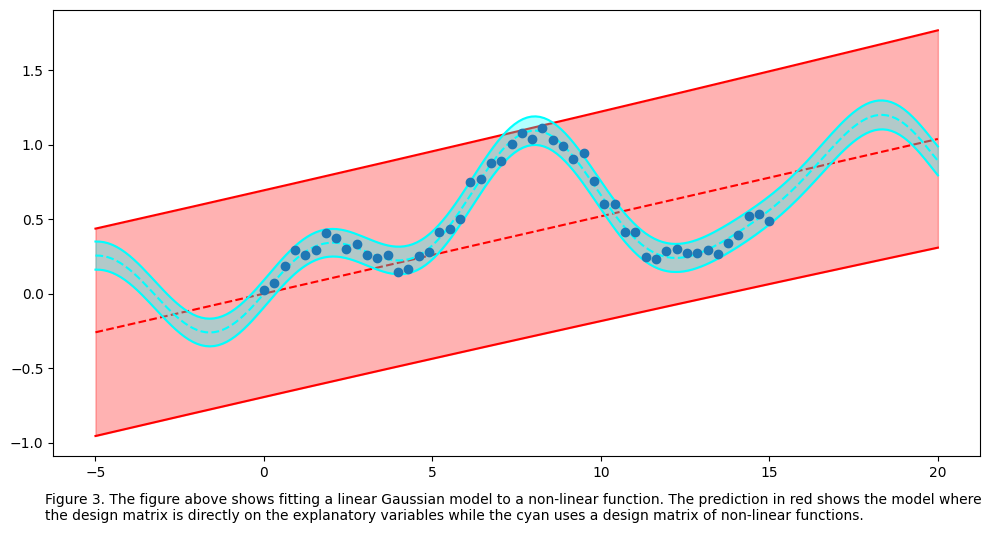

In [ ]:
np.random.seed(42)

# Generate data
x = np.linspace(0, 15, 50)
y = 0.2 * np.sin(x) + 0.5 * np.sin(x**2 / 40) + 0.05 * x
y += 0.05 * np.random.randn(x.shape[0])

# Fit a simple linear model
m_linear = sm.OLS(y, x)
results = m_linear.fit()

# Design matrix with additional basis function -np.sin(x)
design = np.concatenate((
    np.sin(x).reshape(-1, 1),
    np.sin(x**2 / 40).reshape(-1, 1),
    x.reshape(-1, 1),
    -np.sin(x).reshape(-1, 1)
), axis=1)
m_linear_basis = sm.OLS(y, design)
results_basis = m_linear_basis.fit()

# Predictions
x_pred = np.linspace(-5, 20, 200).reshape(-1, 1)
design_pred = np.concatenate((
    np.sin(x_pred),
    np.sin(x_pred**2 / 40),
    x_pred,
    -np.sin(x_pred)
), axis=1)

y_pred_linear = results.get_prediction(x_pred).summary_frame(alpha=0.05)
y_pred_linear_basis = results_basis.get_prediction(design_pred).summary_frame(alpha=0.05)

# Plotting
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.scatter(x, y, zorder=2)

# Linear model predictions
ax.plot(x_pred, y_pred_linear['mean'], color='red', linestyle='--', zorder=1)
ax.plot(x_pred, y_pred_linear['obs_ci_lower'], color='red', linestyle='-', zorder=1)
ax.plot(x_pred, y_pred_linear['obs_ci_upper'], color='red', linestyle='-', zorder=1)
ax.fill_between(x_pred.flatten(), y_pred_linear['obs_ci_lower'], y_pred_linear['obs_ci_upper'], color='red', alpha=0.3, zorder=1)

# Basis model predictions
ax.plot(x_pred, y_pred_linear_basis['mean'], color='cyan', linestyle='--', zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_lower'], color='cyan', linestyle='-', zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_upper'], color='cyan', linestyle='-', zorder=1)
ax.fill_between(x_pred.flatten(), y_pred_linear_basis['obs_ci_lower'], y_pred_linear_basis['obs_ci_upper'], color='cyan', alpha=0.3, zorder=1)

fig.text(.05, -.05, "Figure 3. The figure above shows fitting a linear Gaussian model to a non-linear function. The prediction in red shows the model where\nthe design matrix is directly on the explanatory variables while the cyan uses a design matrix of non-linear functions.")

plt.tight_layout()
plt.show()

In [ ]:
print(results_basis.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              2592.
Date:                Thu, 21 Nov 2024   Prob (F-statistic):                    3.49e-52
Time:                        16:05:55   Log-Likelihood:                          85.315
No. Observations:                  50   AIC:                                     -164.6
Df Residuals:                      47   BIC:                                     -158.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

As you can see from the the last example if we have multiple possible
explanations we end up with a model where there are several symmetric
explanations that cannot be differentiated under the objective function.
To overcome we have to encode a *preference* to the solution we want.

## Regularisation

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_address/includes/Regularisation.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_address/includes/Regularisation.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In order to encode a preference towards specific solutions, we will
include an additional term in the objective that depends only on the
parameters $\beta$. This is commonly done using an $L_p$-norm:

$$
\hat{\beta} = \arg \max_{\beta} \prod_{i=1}^{N} p(y_i | x_i, \beta) + \alpha \left( \sum_{j=1}^{d} |\beta_j|^p \right)^{\frac{1}{p}}.
$$

The two most commonly used norms are the $L_2$, referred to as *ridge
regression*, as it encodes a preference towards solutions where the
parameters take equally large values, and $L_1$, referred to as *lasso*,
as it prefers solutions that “home in” on a few active parameters to
explain the data.The following plot shows the regularisation surfaces of
$L_2$ in blue and $L_1$ regularisation in red.

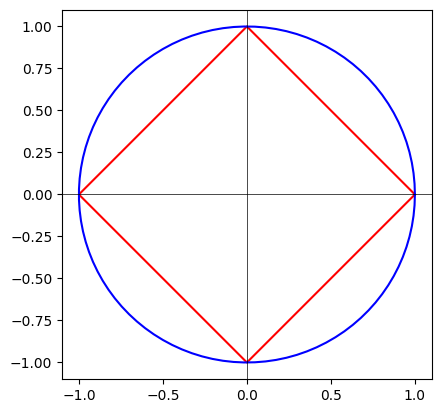

In [ ]:
plt.plot([1, 0, -1, 0, 1], [0, 1, 0, -1, 0], 'r')  # L1
plt.plot(np.cos(np.linspace(0, 2 * np.pi, 100)), np.sin(np.linspace(0, 2 * np.pi, 100)), 'b')  # L2

plt.gca().set_aspect('equal', 'box'), plt.axhline(0, color='k', linewidth=0.5), plt.axvline(0, color='k', linewidth=0.5)
plt.show()

In `statsmodels` we can use the regularisation above by changing the
call to fit the model from `fit` to `fit_regularised`. Taking two
additional scalar parameters `alpha` and `L1_wt` where the former sets
the strength of regularizer and the latter balances the L1 and L2
regularization.

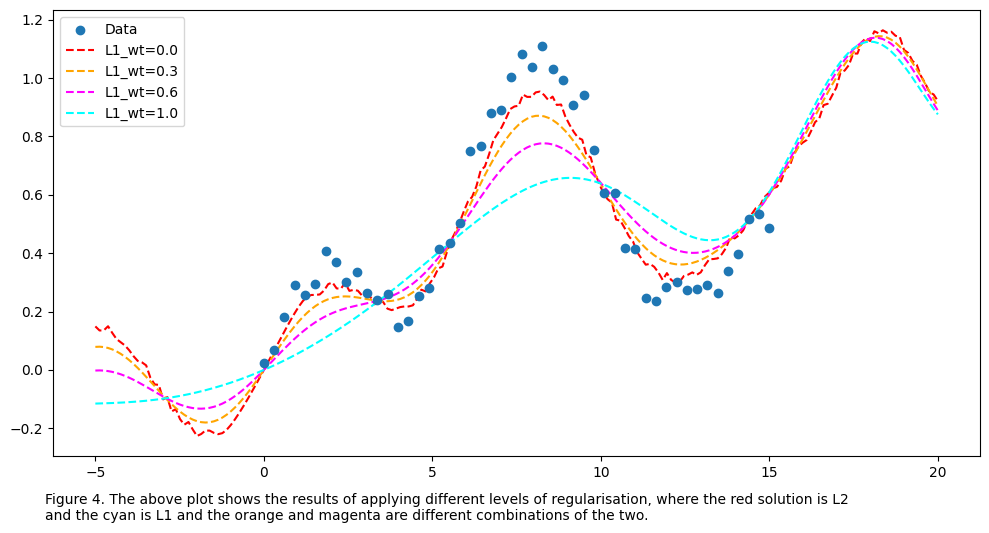

In [ ]:
np.random.seed(42)

# Generate data
x = np.linspace(0, 15, 50)
y = 0.2 * np.sin(x) + 0.5 * np.sin(x**2 / 40) + 0.05 * x
y += 0.05 * np.random.randn(x.shape[0])

# Create design matrix
design = np.concatenate((np.sin(x).reshape(-1, 1),
                         np.sin(x**2 / 40).reshape(-1, 1),
                         x.reshape(-1, 1),
                         np.sin(x**2 / 20).reshape(-1, 1),
                         np.sin(x**3).reshape(-1, 1)), axis=1)

# Fit regularized models with different L1 weights
m_linear_basis = sm.OLS(y, design)
results_basis_0 = m_linear_basis.fit_regularized(alpha=0.10, L1_wt=0.0)
results_basis_1 = m_linear_basis.fit_regularized(alpha=0.10, L1_wt=0.3)
results_basis_2 = m_linear_basis.fit_regularized(alpha=0.10, L1_wt=0.6)
results_basis_3 = m_linear_basis.fit_regularized(alpha=0.10, L1_wt=1.0)

# Prediction data
x_pred = np.linspace(-5, 20, 200).reshape(-1, 1)
design_pred = np.concatenate((np.sin(x_pred),
                              np.sin(x_pred**2 / 40),
                              x_pred,
                              np.sin(x_pred**2 / 20),
                              np.sin(x_pred**3)), axis=1)

# Predictions for each model
y_pred_0 = results_basis_0.predict(design_pred)
y_pred_1 = results_basis_1.predict(design_pred)
y_pred_2 = results_basis_2.predict(design_pred)
y_pred_3 = results_basis_3.predict(design_pred)

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x, y, zorder=2, label="Data")
ax.plot(x_pred, y_pred_0, color='red', linestyle='--', zorder=1, label="L1_wt=0.0")
ax.plot(x_pred, y_pred_1, color='orange', linestyle='--', zorder=1, label="L1_wt=0.3")
ax.plot(x_pred, y_pred_2, color='magenta', linestyle='--', zorder=1, label="L1_wt=0.6")
ax.plot(x_pred, y_pred_3, color='cyan', linestyle='--', zorder=1, label="L1_wt=1.0")

ax.legend()
fig.text(.05, -.05, "Figure 4. The above plot shows the results of applying different levels of regularisation, where the red solution is L2\nand the cyan is L1 and the orange and magenta are different combinations of the two.")
plt.tight_layout()
plt.show()

## Localised Basis Functions

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_address/includes/Localised_Basis_Functions.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_address/includes/Localised_Basis_Functions.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Another way to think about designing a set of basis functions is to make
them connected to the data, we could think about placing a non-linear
transformation of each point

$$ y_i = \sum_{j=1}^{N} \beta_j \, \phi(x_j , x_i) $$

$$ \phi(x_j , x_i) = e^{- (x_i - x_j)^T (x_i - x_j)} $$

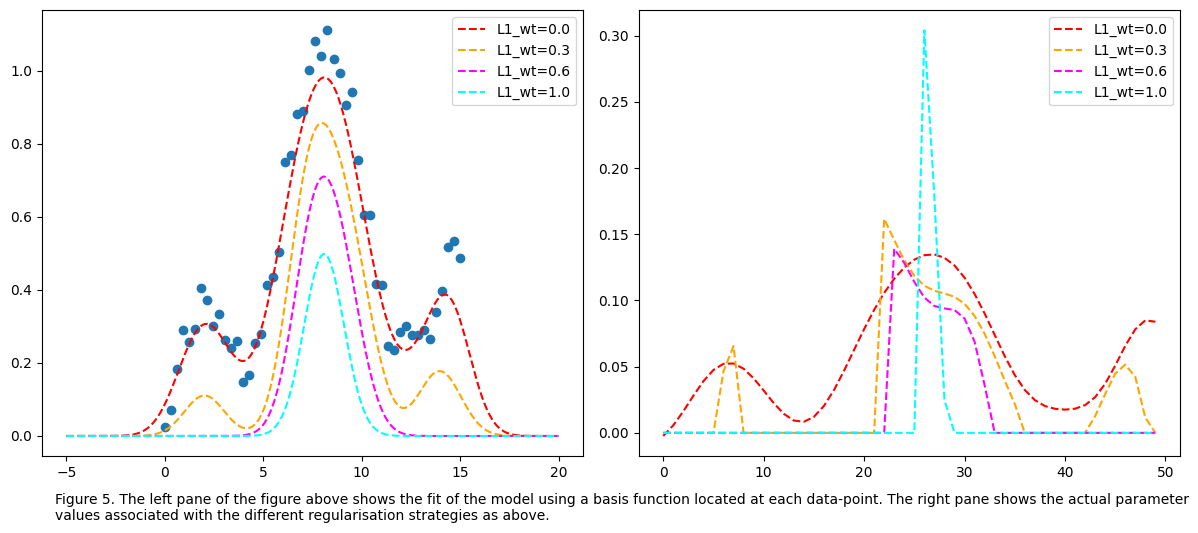

In [ ]:
np.random.seed(42)

# Generate data
x = np.linspace(0, 15, 50)
y = 0.2 * np.sin(x) + 0.5 * np.sin(x**2 / 40) + 0.05 * x
y += 0.05 * np.random.randn(x.shape[0])

# Define the RBF kernel function for localized basis functions
def rbf_kernel(x1, x2, length_scale=1.0):
    return np.exp(-((x1 - x2.T) ** 2) / (2 * length_scale ** 2))

# Create the design matrix using RBF kernel
phi = rbf_kernel(x[:, np.newaxis], x[:, np.newaxis])

# Fit regularized models with different L1 weights
m_rbf_basis = sm.OLS(y, phi)
results_rbf_0 = m_rbf_basis.fit_regularized(alpha=0.10, L1_wt=0.0)
results_rbf_1 = m_rbf_basis.fit_regularized(alpha=0.10, L1_wt=0.3)
results_rbf_2 = m_rbf_basis.fit_regularized(alpha=0.10, L1_wt=0.6)
results_rbf_3 = m_rbf_basis.fit_regularized(alpha=0.10, L1_wt=1.0)

# Prediction data
x_pred = np.linspace(-5, 20, 200).reshape(-1, 1)
phi_pred = rbf_kernel(x_pred, x)

# Predictions for each model
y_pred_rbf_0 = results_rbf_0.predict(phi_pred)
y_pred_rbf_1 = results_rbf_1.predict(phi_pred)
y_pred_rbf_2 = results_rbf_2.predict(phi_pred)
y_pred_rbf_3 = results_rbf_3.predict(phi_pred)

# Extract parameter values for each model
params_0 = results_rbf_0.params
params_1 = results_rbf_1.params
params_2 = results_rbf_2.params
params_3 = results_rbf_3.params

# Plot model fit and parameter values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Model fit with different regularization levels
ax1.scatter(x, y)
ax1.plot(x_pred, y_pred_rbf_0, '--', color='red', label="L1_wt=0.0")
ax1.plot(x_pred, y_pred_rbf_1, '--', color='orange', label="L1_wt=0.3")
ax1.plot(x_pred, y_pred_rbf_2, '--', color='magenta', label="L1_wt=0.6")
ax1.plot(x_pred, y_pred_rbf_3, '--', color='cyan', label="L1_wt=1.0")
ax1.legend()

# Parameter values for each regularization strategy
ax2.plot(range(len(params_0)), params_0, '--', color='red', label="L1_wt=0.0")
ax2.plot(range(len(params_1)), params_1, '--', color='orange', label="L1_wt=0.3")
ax2.plot(range(len(params_2)), params_2, '--', color='magenta', label="L1_wt=0.6")
ax2.plot(range(len(params_3)), params_3, '--', color='cyan', label="L1_wt=1.0")
ax2.legend()

fig.text(.05, -.05, "Figure 5. The left pane of the figure above shows the fit of the model using a basis function located at each data-point. The right pane shows the actual parameter\nvalues associated with the different regularisation strategies as above.")

plt.tight_layout()
plt.show()

As we can see from the figure above, the interpretation of the solution
for the localised basis function model changes slightly. What we can now
say is something similar to, “how important is each of the training data
points for prediction”. Especially interesting is the very strongly
regularised solution shown in cyan. This can be interpreted as “if we
want to predict the data, which is the single most representative
point”. The notion of a localised basis function can through this
interpretation provide a rich explanation that is often very
interpretable.

The type of data-centric basis functions that we explained above are
very commonly used and if continue your study of machine learning during
the year you will see a lot more of these basis functions as they are
the foundation of a large range of different models from Support Vector
Machines Vapnik, 1999 to Gaussian processes Rasmussen et al., 2006.
Importantly as they solve an $N \times N$ regression problem the crucial
ingredient is how do we regularise to solution space so that we can
recover a solution.

## Applying Model Framework

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_address/includes/Applying_Model_Framework.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_address/includes/Applying_Model_Framework.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

You should now try out the model framework that we described above on a
dataset derived from the 2021 UK Census Dataset. Let’s start by
downloading the data.

In [ ]:
import requests
import zipfile
import io
import os
import pandas as pd

In [ ]:
def download_census_data(code, base_dir=''):
  url = f'https://www.nomisweb.co.uk/output/census/2021/census2021-{code.lower()}.zip'
  extract_dir = os.path.join(base_dir, os.path.splitext(os.path.basename(url))[0])

  if os.path.exists(extract_dir) and os.listdir(extract_dir):
    print(f"Files already exist at: {extract_dir}.")
    return

  os.makedirs(extract_dir, exist_ok=True)
  response = requests.get(url)
  response.raise_for_status()

  with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
    zip_ref.extractall(extract_dir)

  print(f"Files extracted to: {extract_dir}")

In [ ]:
def load_census_data(code, level='msoa'):
  return pd.read_csv(f'census2021-{code.lower()}/census2021-{code.lower()}-{level}.csv')

In [ ]:
download_census_data('TS007') # Age by single year of age

age_df = load_census_data('TS007', level='ltla')
# Preparing the columns we want
age_df

Files already exist at: census2021-ts007.


,date,geography,geography code,Age: Total; measures: Value,Age: Aged 4 years and under; measures: Value,Age: Aged under 1 year; measures: Value,Age: Aged 1 year; measures: Value,Age: Aged 2 years; measures: Value,Age: Aged 3 years; measures: Value,Age: Aged 4 years; measures: Value,...,Age: Aged 91 years; measures: Value,Age: Aged 92 years; measures: Value,Age: Aged 93 years; measures: Value,Age: Aged 94 years; measures: Value,Age: Aged 95 years; measures: Value,Age: Aged 96 years; measures: Value,Age: Aged 97 years; measures: Value,Age: Aged 98 years; measures: Value,Age: Aged 99 years; measures: Value,Age: Aged 100 years and over; measures: Value
0,2021,Hartlepool,E06000001,92334,4983,918,954,1046,988,1077,...,130,110,92,62,48,30,19,19,14,21
1,2021,Middlesbrough,E06000002,143922,8928,1621,1720,1766,1908,1913,...,217,153,112,82,61,47,38,18,15,22
2,2021,Redcar and Cleveland,E06000003,136536,6814,1176,1347,1353,1429,1509,...,256,187,150,129,85,64,48,26,18,24
3,2021,Stockton-on-Tees,E06000004,196594,10733,1916,2078,2150,2178,2411,...,262,224,144,120,88,55,54,34,29,28
4,2021,Darlington,E06000005,107807,5494,1040,1048,1109,1167,1130,...,178,137,105,104,73,53,20,38,25,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,2021,Torfaen,W06000020,92274,5002,915,962,1019,1026,1080,...,157,101,77,63,58,43,26,18,16,20
327,2021,Monmouthshire,W06000021,92961,3962,735,737,798,828,864,...,221,174,144,102,92,70,48,29,23,31
328,2021,Newport,W06000022,159594,9733,1839,1908,1968,1995,2023,...,215,177,159,135,81,66,46,34,19,30
329,2021,Powys,W06000023,133174,5731,1052,1053,1162,1231,1233,...,299,231,211,151,136,108,63,42,27,56


In [ ]:
age_df = age_df.drop(age_df.columns[[0,2,3,4,10,16,23,28,34,45,61,77,88,99,115]], axis=1).set_index('geography')
age_df.columns = list(range(100))

In [ ]:
age_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
geography,,,,,,,,,,,,,,,,,,,,,
Hartlepool,918,954,1046,988,1077,1109,1032,1097,1172,1172,...,181,130,110,92,62,48,30,19,19,14
Middlesbrough,1621,1720,1766,1908,1913,1861,1920,1950,2079,1985,...,248,217,153,112,82,61,47,38,18,15
Redcar and Cleveland,1176,1347,1353,1429,1509,1461,1503,1513,1657,1740,...,323,256,187,150,129,85,64,48,26,18
Stockton-on-Tees,1916,2078,2150,2178,2411,2344,2314,2459,2722,2590,...,408,262,224,144,120,88,55,54,34,29
Darlington,1040,1048,1109,1167,1130,1220,1229,1257,1305,1319,...,241,178,137,105,104,73,53,20,38,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Torfaen,915,962,1019,1026,1080,1104,954,1083,1138,1153,...,214,157,101,77,63,58,43,26,18,16
Monmouthshire,735,737,798,828,864,913,877,898,972,981,...,285,221,174,144,102,92,70,48,29,23
Newport,1839,1908,1968,1995,2023,2158,2121,2020,2014,2023,...,268,215,177,159,135,81,66,46,34,19


Below we will plot the overall age structure of the UK population in
2021. This profile is not very straightforward, and has historical
reasons. Have a look online to understand the data better - you should
see a similar chart
[here](https://en.wikipedia.org/wiki/Demographics_of_England).

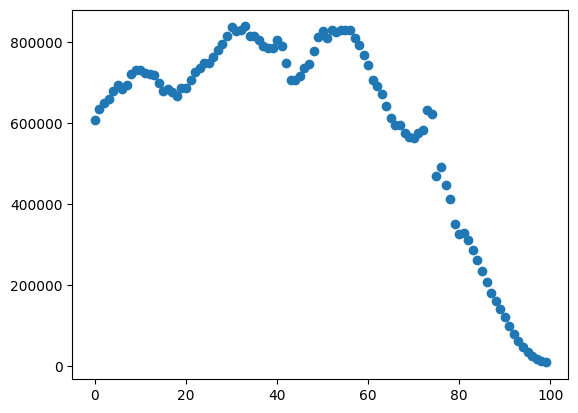

In [ ]:
plt.scatter(range(100), age_df.sum(axis=0))
plt.show()

The data looks very different when we look at individual cities. For
example, Cambridge has a very different age profile than most of the UK.

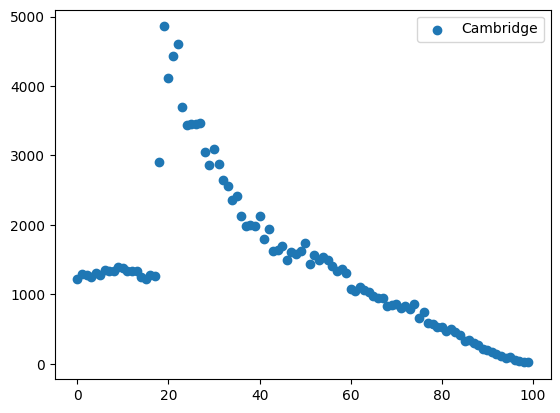

In [ ]:
x_values = range(100)

plt.scatter(x_values, age_df.loc['Cambridge'], label='Cambridge')

plt.legend()
plt.show()

Now try to use the framework that we have derived to explain the two
data-sets above. There is no right or wrong answer here, what we are
looking for is a motivation of why you have made the choices that you
have made and how this effects the conclusions that you can draw.

In [ ]:
%pip uninstall --yes fynesse
%pip install git+https://github.com/ClaireCooper/cjc233_ads_2024.git
%load_ext autoreload
%autoreload 2

Found existing installation: fynesse 0.1.0
Uninstalling fynesse-0.1.0:
  Successfully uninstalled fynesse-0.1.0
  Cloning https://github.com/ClaireCooper/cjc233_ads_2024.git to /tmp/pip-req-build-99nisqiy
  Running command git clone --filter=blob:none --quiet https://github.com/ClaireCooper/cjc233_ads_2024.git /tmp/pip-req-build-99nisqiy
  Resolved https://github.com/ClaireCooper/cjc233_ads_2024.git to commit 74e08d1da939e6721ac95fde51630709f2fdbe5e
  Preparing metadata (setup.py) ... done
  Created wheel for fynesse: filename=fynesse-0.1.0-py3-none-any.whl size=10139 sha256=c212bec4808575d3c31b30a3972ba93c25043b595597c27ac68f7b79aaa77d80
  Stored in directory: /tmp/pip-ephem-wheel-cache-_qsc95yo/wheels/da/9d/ca/657fa6279e58f5b5a5271c4936292fe40fe19329f4e2c79896
Successfully built fynesse


In [ ]:
%pip install pymysql

In [ ]:
%pip install osmnx

In [ ]:
%pip install kneed

### Exercise 1

Would it make sense to split up the data-set in different regions and
fit separate models.

If so, what is the criteria that you split the data
using?

### Exercise 1 Answer

It would make sense to split up the data-set by region because there are different patterns at different ages; for the UK data, it seems that after about 74 the population declines rapidly, which of course makes sense because that is just below the UK average life expectancy (82). For the Cambridge data, there is a big difference jump at 18 because of all the students.

So we could split the data at points where there is a big jump between values.

### Exercise 2

What would be a sensible design matrix?

### Exercise 2 Answer

For x=age, y=number of people of that age

**UK Data**

Firstly, we can split the data into above and below 74. I have done this using a boolean indexing array.

For the ages below 74, there is a clear periodicity, so I have included a periodic function sin(x), this make sense because it seems likely that birth rates and immigration follow a cycle of ups and downs. We need to estimate a period for this function. I have used 24 years. To avoid having to estimate an offset, I have added in a cos term as well.

After plotting the residuals with just this term, and from looking at the graph, there clearly a bulge in the population in middle age. To account for this, I added a quadratic term centered in the middle of the lower age group. This bulge is from an increase in births in the 80s and nineties.

For the ages above 74, the amount of people at each age decreases since people are dying of old age. This follows a convex curve, so I used a log function (which will have a negative coefficient) to represent this.

I also needed to add a constant term for each group.

**Cambridge Data**

Looking at the Cambridge data, the simplest thing to do is to just model three straight lines; the amount of children of any age is essentially constant, there is a very large amount of students which decreases linearly as people graduate and move away, and this rate of change increases in middle age, as people start to move away for example to buy a house, and at an older age they die.

In [ ]:
x = np.arange(100)
uk_y = age_df.sum(axis=0)
cam_y = age_df.loc['Cambridge']

def uk_design(x, age_limit = 74):
  young_limit = age_limit
  young_x_filter = x<=young_limit
  old_x_filter = x>young_limit
  return np.concatenate((
      young_x_filter.reshape(-1,1),
      (((x-(young_limit/2))**2)*young_x_filter).reshape(-1,1),
      (np.cos(x * np.pi / 12)*young_x_filter).reshape(-1,1),
      (np.sin(x * np.pi / 12)*young_x_filter).reshape(-1,1),
      old_x_filter.reshape(-1,1),
      (np.log(x+1)*old_x_filter).reshape(-1,1),
      ), axis=1)

def cam_design(x):
  young_limit = 18
  young_x_filter = x<=young_limit
  middle_x_filter = np.logical_and(young_limit<x, x<38)
  old_x_filter = x>=38
  return np.concatenate((
      young_x_filter.reshape(-1,1),
      middle_x_filter.reshape(-1,1),
      old_x_filter.reshape(-1,1),
      (x*middle_x_filter).reshape(-1,1),
      (x*old_x_filter).reshape(-1,1),
      ), axis=1)

### Exercise 3

What GLM models would make sense to fit?

### Exercise 3 Answer


In [ ]:
def y_pred(family_with_link, x, y, x_pred, design_fn, alpha=0.05, silent=False):
  y_GLM = sm.GLM(y, design_fn(x), family=family_with_link)
  y_model = y_GLM.fit()
  if not silent:
    print(y_model.summary())
  return y_model.get_prediction(design_fn(x_pred)).summary_frame(alpha=alpha)

In [ ]:
def plot_pred(ax, x_pred, y_pred, color, label):
  ax.plot(x_pred,y_pred['mean'],color=color,linewidth=3.0,zorder=2, label=label+' mean')
  ax.plot(x_pred,y_pred['mean_ci_lower'], color=color,linestyle='--', zorder=2, label=label+' mean CI')
  ax.plot(x_pred,y_pred['mean_ci_upper'], color=color,linestyle='--', zorder=2)

In [ ]:
def plot_preds_by_link(y_preds, x, y, x_pred, names):
  fig, axes = plt.subplots(1, len(y_preds), figsize=(15,5), sharey=True)
  if len(y_preds) > 1:
    for i in range(len(y_preds)):
      axes[i].scatter(x, y, color='blue',alpha=0.5,zorder=1)
      plot_pred(axes[i], x_pred, y_preds[i], 'red', names[i] + ' link')

    for ax in axes:
      ax.legend()
  else:
    axes.scatter(x, y,color='blue',alpha=0.5,zorder=1)
    plot_pred(axes, x_pred, y_preds[0], 'red', names[0] + ' link')
    axes.legend()

  plt.tight_layout()
  plt.show()

In [ ]:
def plot_residuals_by_link(y, y_preds, names):
  fig, axes = plt.subplots(1,len(y_preds), figsize=(15,5))
  for i in range(len(y_preds)):
    axes[i].scatter(x.reshape(-1,1), y-y_preds[i], color='red', alpha=0.7)
    axes[i].set_title('Residuals with ' + names[i] + ' link function')
  for ax in axes:
    ax.vlines(74.5, ax.get_ylim()[0], ax.get_ylim()[1])

####UK wide data

In [ ]:
x_pred = np.arange(120)
y_pred_gaussian = y_pred(sm.families.Gaussian(), x, uk_y, x_pred, uk_design)
y_pred_poisson = y_pred(sm.families.Poisson(sm.families.links.Log()), x, uk_y, x_pred, uk_design)
y_pred_gamma = y_pred(sm.families.Gamma(sm.families.links.Log()), x, uk_y, x_pred, uk_design)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       94
Model Family:                Gaussian   Df Model:                            5
Link Function:               Identity   Scale:                      4.1854e+08
Method:                          IRLS   Log-Likelihood:                -1131.4
Date:                Thu, 21 Nov 2024   Deviance:                   3.9343e+10
Time:                        16:06:35   Pearson chi2:                 3.93e+10
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          7.948e+05   3569.759    222.652      0.0

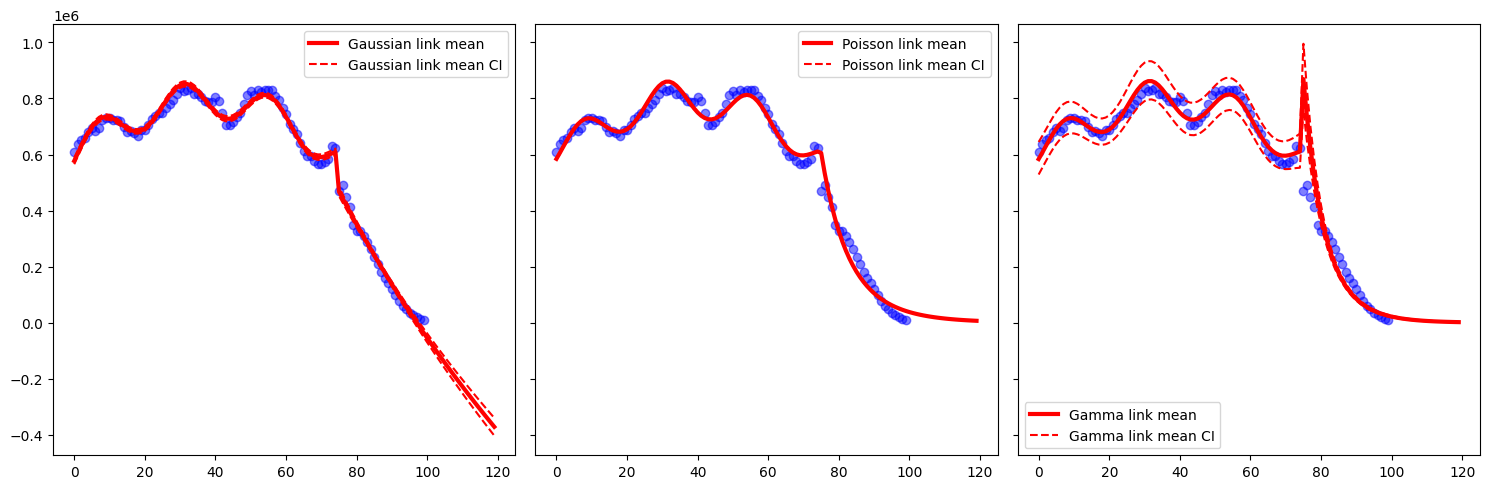

In [ ]:
plot_preds_by_link([y_pred_gaussian, y_pred_poisson, y_pred_gamma], x, uk_y, x_pred, ['Gaussian', 'Poisson', 'Gamma'])

By plotting functions for different link functions, it is clear that the Poisson link is most suitable. This again makes sense, as we could assume that there is an equal likelihood of death each year (though of course this is not true).

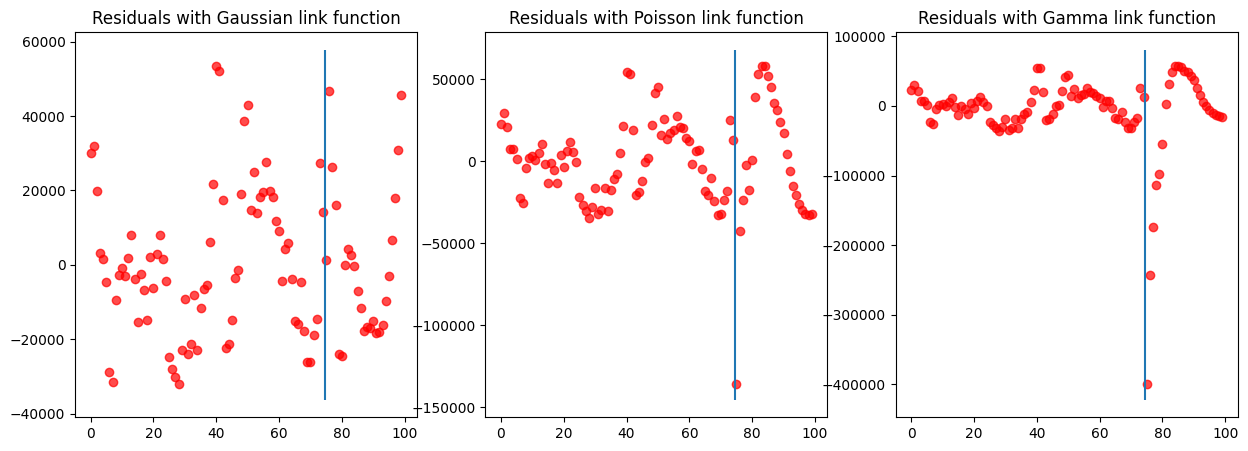

In [ ]:
plot_residuals_by_link(uk_y, [y_pred_gaussian['mean'][:100], y_pred_poisson['mean'][:100],y_pred_gamma['mean'][:100]], ['Gaussian', 'Poisson', 'Gamma'])

####Cambridge data

In [ ]:
x_pred = np.arange(120)
y_pred_gaussian = y_pred(sm.families.Gaussian(), x, cam_y, x_pred, cam_design)
y_pred_poisson = y_pred(sm.families.Poisson(sm.families.links.Log()), x, cam_y, x_pred, cam_design)
y_pred_gamma = y_pred(sm.families.Gamma(sm.families.links.Log()), x, cam_y, x_pred, cam_design)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Cambridge   No. Observations:                  100
Model:                            GLM   Df Residuals:                       95
Model Family:                Gaussian   Df Model:                            4
Link Function:               Identity   Scale:                          39472.
Method:                          IRLS   Log-Likelihood:                -668.50
Date:                Thu, 21 Nov 2024   Deviance:                   3.7498e+06
Time:                        16:06:37   Pearson chi2:                 3.75e+06
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1387.6842     45.579     30.445      0.0

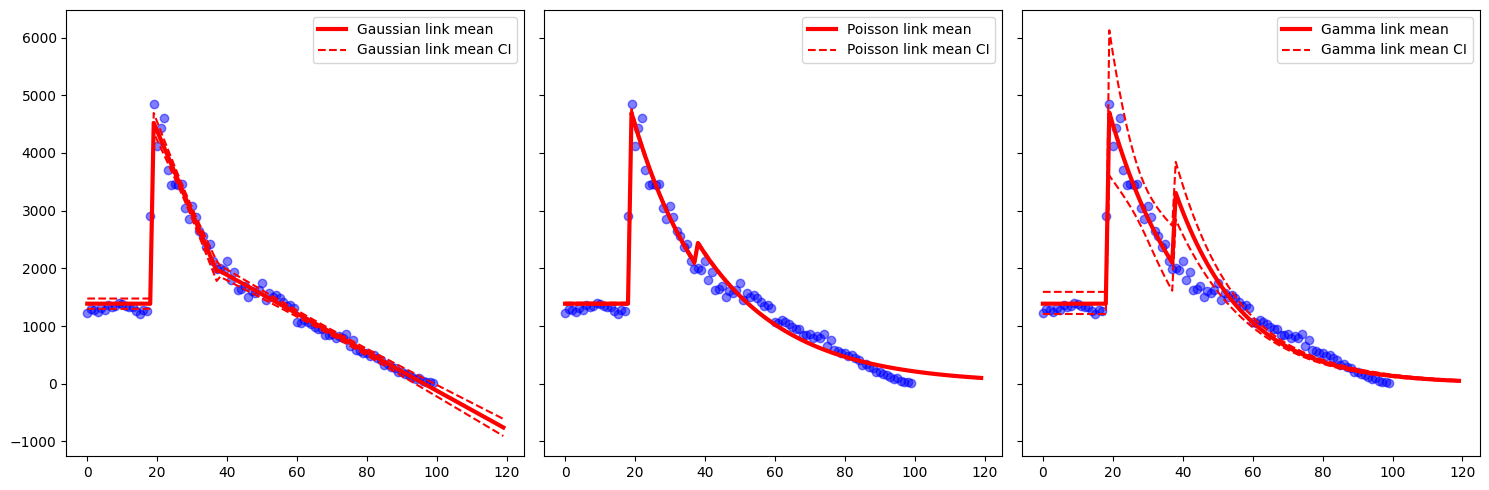

In [ ]:
plot_preds_by_link([y_pred_gaussian, y_pred_poisson, y_pred_gamma], x, cam_y, x_pred, ['Gaussian', 'Poisson', 'Gamma'])

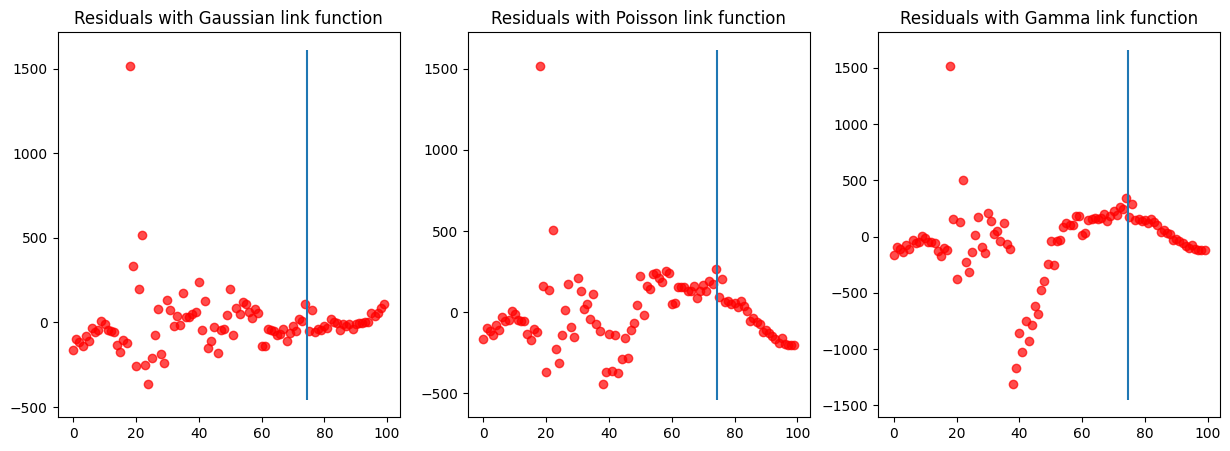

In [ ]:
plot_residuals_by_link(cam_y, [y_pred_gaussian['mean'][:100], y_pred_poisson['mean'][:100],y_pred_gamma['mean'][:100]], ['Gaussian', 'Poisson', 'Gamma'])

During the check-session we will ask you a few questions on how you have
reasoned when fitting the data. Again, what we are looking for is
motivation not “the best fit”.

## Practical Modelling

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_address/includes/Practical_Modelling.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_address/includes/Practical_Modelling.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

### Linear modelling

You probably inferred in the previous exercise, that age-profiles of
individual cities are heavilly impacted by students. Let’s use data from
the 2021 Census to try and predict age profile information of all
cities.

What we actually will be predicting, is the share of population in a
given city that is of a certain age, given NS-SEC information. Let’s
normalise the `age_df` and select the share of 21-year-olds in each
city. This is the value we are trying to predict.

In [ ]:
norm_age_df = age_df.div(age_df.sum(axis=1), axis=0).sort_index()
norm_age_df[21]

,21
geography,
Adur,0.008462
Allerdale,0.008811
Amber Valley,0.009075
Arun,0.008513
Ashfield,0.009352
...,...
Wrexham,0.009557
Wychavon,0.007739
Wyre,0.007970


### Exercise 4

We don’t have any data to make a model yet - let’s change that. Select
features to use, starting with the relative student population of each
city (`L15` in `TS062`). Make a LinearRegression model to find the
relationship between the student population in a city, and the
percentage of 21 year olds there. Use the model to make predictions and
examine the predictive power by plotting the correlation of `y` and
`y_pred`.

### Exercise 4 Answer

Write your answer to Exercise 4 here

In [ ]:
def y_pred_ols(x, y, x_pred, design_fn, alpha=0.05, silent=False):
  y_GLM = sm.OLS(y, design_fn(x))
  y_model = y_GLM.fit()
  if not silent:
    print(y_model.summary())
  return y_model.get_prediction(design_fn(x_pred)).summary_frame(alpha=alpha)

In [ ]:
download_census_data('TS062')

student_population_df = load_census_data('TS062', level='ltla')
student_population_df = student_population_df.drop(student_population_df.columns[[0,2,3]], axis=1).set_index('geography')

student_population_df.columns = ['L1-3', 'L4-6', 'L7', 'L8-9', 'L10-11', 'L12', 'L13', 'L14', 'L15']
student_population_df

Files already exist at: census2021-ts062.


,L1-3,L4-6,L7,L8-9,L10-11,L12,L13,L14,L15
geography,,,,,,,,,
Hartlepool,5272,12650,8244,5595,5062,11056,11738,10531,4538
Middlesbrough,7687,17342,12235,7900,6759,15840,17160,17460,11555
Redcar and Cleveland,8273,19920,12435,8897,8961,17123,16788,13910,6034
Stockton-on-Tees,16007,30972,19209,11857,10090,20134,22280,17954,9507
Darlington,9125,17147,10890,7303,5230,11383,13399,8992,4636
...,...,...,...,...,...,...,...,...,...
Torfaen,6516,14229,9378,5741,5360,11045,12337,6658,3850
Monmouthshire,12371,18369,8437,9727,4120,8341,8562,4628,3684
Newport,14007,24712,16297,9666,7423,15766,19016,12517,8019


In [ ]:
norm_student_population_df = student_population_df.div(age_df.sum(axis=1), axis=0).sort_index()
norm_student_population_df

,L1-3,L4-6,L7,L8-9,L10-11,L12,L13,L14,L15
geography,,,,,,,,,
Adur,0.096445,0.174323,0.109184,0.110207,0.045921,0.107107,0.081598,0.056289,0.039598
Allerdale,0.083274,0.154554,0.081704,0.097651,0.064539,0.119591,0.131481,0.072289,0.032478
Amber Valley,0.098497,0.164675,0.093576,0.084707,0.060392,0.105805,0.132117,0.057412,0.035490
Arun,0.091627,0.173065,0.106706,0.110237,0.052355,0.116615,0.096991,0.059891,0.039321
Ashfield,0.064531,0.137916,0.095130,0.071183,0.064761,0.120288,0.151853,0.072125,0.036641
...,...,...,...,...,...,...,...,...,...
Wrexham,0.073270,0.149701,0.098468,0.073670,0.056733,0.110646,0.135377,0.067378,0.051063
Wychavon,0.125298,0.179072,0.097792,0.109699,0.047182,0.093723,0.098328,0.048292,0.036581
Wyre,0.089431,0.173527,0.111054,0.106148,0.050948,0.104048,0.092245,0.072436,0.043183


In [ ]:
def linear_regression_design(x):
  return x

In [ ]:
x = norm_student_population_df['L15'].to_numpy()
y = norm_age_df[21].to_numpy()
x_pred = np.linspace(min(x), max(x), 200)

y_pred_linear = y_pred_ols(x, y, x_pred, linear_regression_design)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                          1.290e+04
Date:                Thu, 21 Nov 2024   Prob (F-statistic):                   1.34e-266
Time:                        16:06:39   Log-Likelihood:                          1607.6
No. Observations:                 331   AIC:                                     -3213.
Df Residuals:                     330   BIC:                                     -3209.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

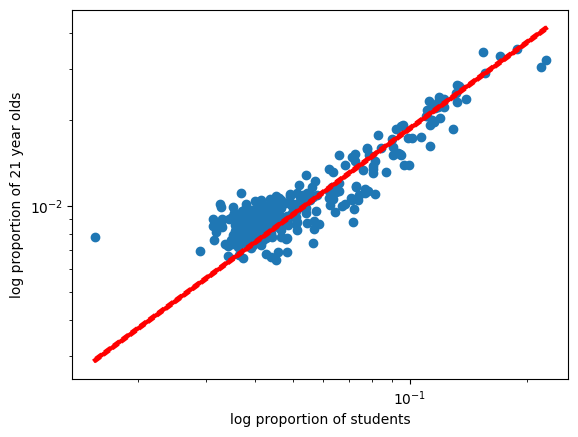

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x, y)
plot_pred(ax, x_pred, y_pred_linear, 'red', 'linear')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('log proportion of students')
ax.set_ylabel('log proportion of 21 year olds')
plt.show()

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                          1.290e+04
Date:                Thu, 21 Nov 2024   Prob (F-statistic):                   1.34e-266
Time:                        16:06:41   Log-Likelihood:                          1607.6
No. Observations:                 331   AIC:                                     -3213.
Df Residuals:                     330   BIC:                                     -3209.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

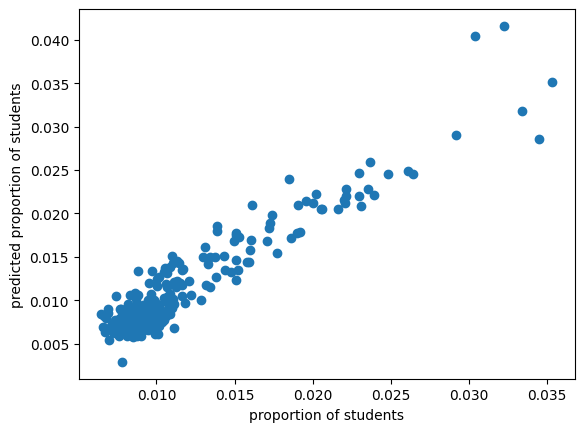

Correlation coefficient: 0.9470086521288434


In [ ]:
fig, ax = plt.subplots()
y_pred_linear = y_pred_ols(x, y, x, linear_regression_design)
ax.scatter(y, y_pred_linear['mean'])
ax.set_xlabel('proportion of students')
ax.set_ylabel('predicted proportion of students')
plt.show()
print('Correlation coefficient:', np.corrcoef(y, y_pred_linear['mean'])[0,1])

We can see above that the pseudo-r sqaured value is 0.947, so y and y-pred are very highly correlated.

### Exercise 5

Now repeat the above analysis using all 9 NS-SEC classification values
as features. Interpret the results, including correlation. Does the new
model perform better?

### Exercise 5 Answer

Write your answer to Exercise 5 here

In [ ]:
import fynesse

In [ ]:
def add_constant_feature(x):
  if x.ndim == 1:
    return (np.append(x,1)).reshape(1,-1)
  return np.append(x, np.ones(len(x)).reshape(-1,1), 1)

In [ ]:
x = norm_student_population_df.to_numpy()
y = norm_age_df[21].to_numpy()

y_pred_linear_all = y_pred_ols(x, y, x, add_constant_feature)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     697.7
Date:                Thu, 21 Nov 2024   Prob (F-statistic):          7.13e-205
Time:                        16:08:02   Log-Likelihood:                 1794.7
No. Observations:                 331   AIC:                            -3569.
Df Residuals:                     321   BIC:                            -3531.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0020      0.006      0.351      0.7

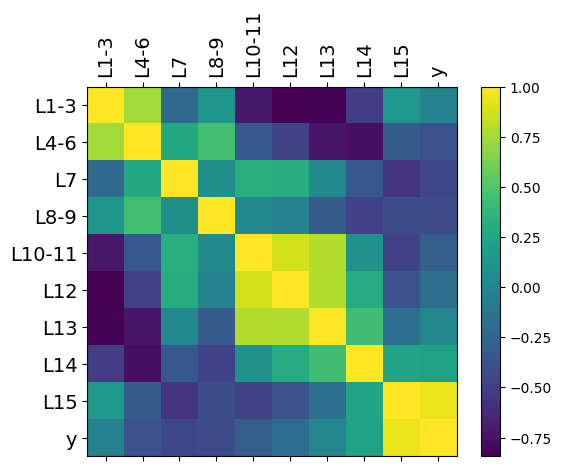

In [ ]:
fig, ax = plt.subplots()
df_with_y = norm_student_population_df.copy()
df_with_y['y'] = y
df_with_y.corr()
fynesse.assess.plot_distance_matrix(fig, ax, df_with_y.corr())
plt.show()

In [ ]:
df_with_y.corr()['y']

,y
L1-3,-0.028248
L4-6,-0.379555
L7,-0.445600
L8-9,-0.423431
L10-11,-0.282090
L12,-0.178214
L13,0.005321
L14,0.217451
L15,0.947009
y,1.000000


We can see from the correlation matrix and the table above that there is not a very strong relationship between the number of 21 year olds and any of the other features. The strongest is a negative correlation of -0.446 with 'intermediate occupations'.

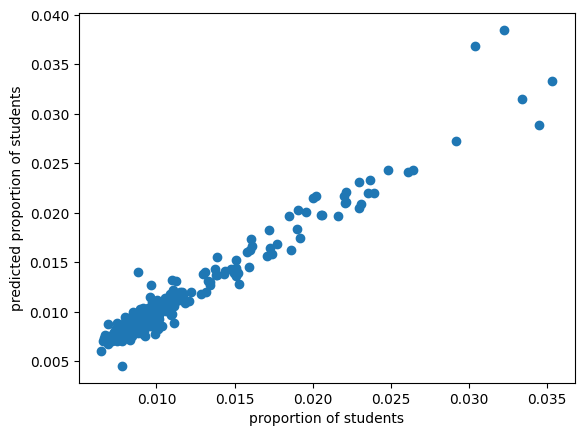

Correlation coefficient: 0.9753800027604058


In [ ]:
fig, ax = plt.subplots()
ax.scatter(y, y_pred_linear_all['mean'])
ax.set_xlabel('proportion of students')
ax.set_ylabel('predicted proportion of students')
plt.show()
print('Correlation coefficient:', np.corrcoef(y, y_pred_linear_all['mean'])[0,1])

### Regularisation

The prediction results achieved by your second model should be more
accurate, with a correlation of about 97%. However, when using as many
parameters as we are (9), we need to be wary of overfitting.

### Exercise 6

Examine if the model is overfitting using *k-fold cross-validation*.
Randomly split the dataset into *k* subsets. Train a model, leaving one
selected subset out for testing. Record the test performance on that
subset. Iterate this for all subsets. Do the results you get differ
depending on the value of *k*? Plot this relationship. Does this match
your expectations?

### Exercise 6 Answer

Write your answer to Exercise 6 here

In [ ]:
def split(k, df):
  min_size = len(df)//k
  left = len(df) % k
  shuffled_df = df.sample(frac=1)
  dfs = []
  for i in range(left):
    dfs.append(shuffled_df.iloc[:min_size+1])
    shuffed_df = shuffled_df.iloc[min_size+1:]
  for i in range(k - left):
    dfs.append(shuffled_df.iloc[:min_size])
    shuffed_df = shuffled_df.iloc[min_size:]
  return dfs

def cross_validate(k, xdf, y_series):
  dfs = split(k, xdf)
  corrs = []
  for i in range(k):
    training = pd.concat(dfs[:i] + dfs[i+1:])
    test = dfs[i]
    test_y = y_series.loc[test.index]

    x = training.to_numpy()
    y = y_series.loc[training.index]
    y = y.to_numpy()

    y_pred_i = y_pred_ols(x, y, test.to_numpy(), add_constant_feature, silent=True)
    corrs.append(np.corrcoef(test_y, y_pred_i['mean'])[0,1])
  return corrs

In [ ]:
subset_ns_df = norm_student_population_df.sample(20)

subset_age_df = norm_age_df.loc[subset_ns_df.index]
means = []
for k in range(2, 21):
  corrs = cross_validate(k, norm_student_population_df, norm_age_df[21])
  means.append(np.mean(corrs))

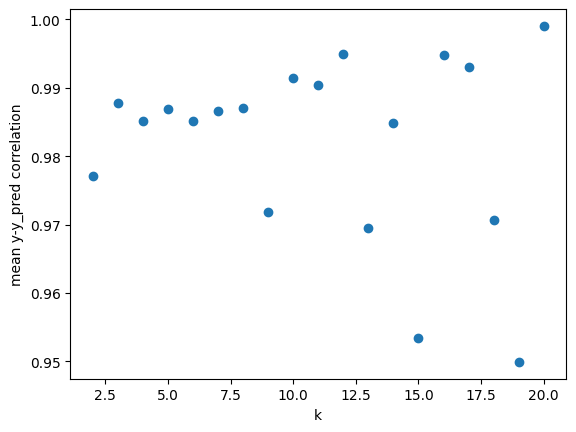

In [ ]:
fig, ax = plt.subplots()
ax.scatter(range(2,21), means)
ax.set_ylabel('mean y-y_pred correlation')
ax.set_xlabel('k')
plt.show()

### Exercise 7

If you found evidence of overfitting, address this by employing both L1
and L2 regularisation. Compare the results against your baseline model.
How did you choose alpha values? What do the results say about potential
feature selection?

### Exercise 7 Answer

Write your answer to Exercise 7 here

In [ ]:
def y_pred_ols_reg(x, y, x_pred, design_fn, alpha, L1_wt, summary_alpha=0.05):
  y_OLS = sm.OLS(y, design_fn(x))
  y_model = y_OLS.fit_regularized(alpha=alpha, L1_wt=L1_wt)
  return y_model.predict(design_fn(x_pred))

In [ ]:
def cross_validate_reg(k, xdf, y_series, alpha, L1_wt):
  dfs = split(k, xdf)
  corrs = []
  for i in range(k):
    training = pd.concat(dfs[:i] + dfs[i+1:])
    test = dfs[i]
    test_y = y_series.loc[test.index]

    x = training.to_numpy()
    y = y_series.loc[training.index]
    y = y.to_numpy()

    y_pred_i = y_pred_ols_reg(x, y, test, add_constant_feature, alpha, L1_wt)
    corrs.append(np.corrcoef(test_y, y_pred_i)[0,1])
  return np.mean(corrs)

In [ ]:
scores_1  = []
scores_p25  = []
scores_p5  = []
scores_p75  = []
scores_0  = []
for alph in range(0, 101, 5):
  scores_0.append(cross_validate_reg(5, norm_student_population_df, age_df[21], alph/100, 0))
  scores_p25.append(cross_validate_reg(5, norm_student_population_df, age_df[21], alph/100, 0.25))
  scores_p5.append(cross_validate_reg(5, norm_student_population_df, age_df[21], alph/100, 0.5))
  scores_p75.append(cross_validate_reg(5, norm_student_population_df, age_df[21], alph/100, 0.75))
  scores_1.append(cross_validate_reg(5, norm_student_population_df, age_df[21], alph/100, 1))

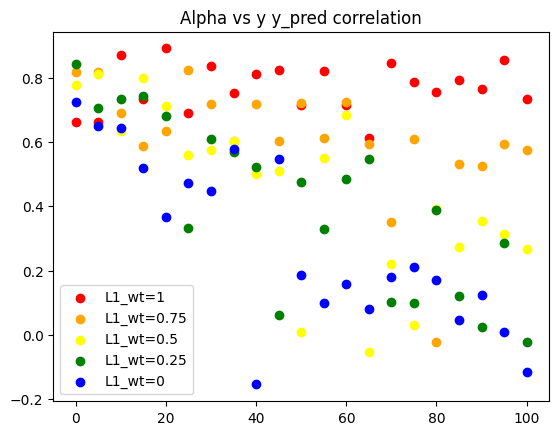

In [ ]:
fig, ax = plt.subplots()

ax.scatter(range(0, 101, 5), scores_1, color='red', label='L1_wt=1')
ax.scatter(range(0, 101, 5), scores_p75, color='orange', label='L1_wt=0.75')
ax.scatter(range(0, 101, 5), scores_p5, color='yellow', label='L1_wt=0.5')
ax.scatter(range(0, 101, 5), scores_p25, color='green', label='L1_wt=0.25')
ax.scatter(range(0, 101, 5), scores_0, color='blue', label='L1_wt=0')
ax.legend()
ax.set_title('Alpha vs y y_pred correlation')
plt.show()

### Prediction

### Exercise 8

Among the models created above, choose the one you believe performs
*best*, and apply it to the entire dataset. Fit a separate linear model
for each of the age groups (0-99). Note down the model coefficients and
plot them.

Based on the graph above, I think that the full model with no regularization performs best; the k-fold validation didn't show huge signs of overfitting.

### Exercise 8 Answer

Write your answer to Exercise 8 here

In [ ]:
import math

In [ ]:
def y_pred_ols_with_coefs(x, y, x_pred, design_fn, alpha=0.05, silent=False):
  y_GLM = sm.OLS(y, design_fn(x))
  y_model = y_GLM.fit()
  if not silent:
    print(y_model.summary())
  return (y_model.get_prediction(design_fn(x_pred)).summary_frame(alpha=alpha), y_model.params)

In [ ]:
x = norm_student_population_df.to_numpy()
y = norm_age_df

y_coefs = []
y_preds = []
for age in range(100):
  r = y_pred_ols_with_coefs(x, y[age].to_numpy(), x, add_constant_feature, silent=True)
  for param_i in range(len(r[1])):
    if len(y_coefs) <= param_i:
      y_coefs.append([])
    y_coefs[param_i].append(abs(r[1][param_i]))
  y_preds.append(r[0])

features = list(norm_student_population_df.columns.values)
features.append('const')

for i in range(len(y_coefs)):
  y_coefs[i] = np.array(y_coefs[i])

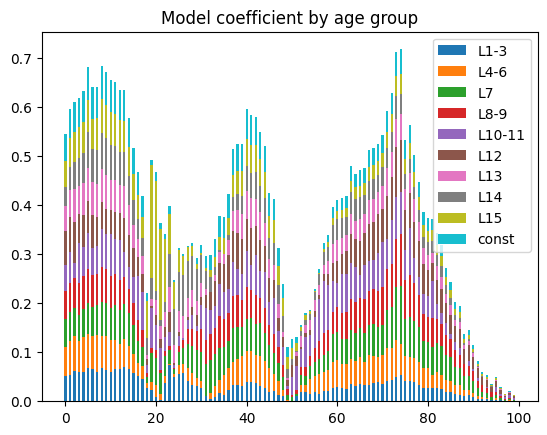

In [ ]:
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(100)


for i, coefs in enumerate(y_coefs):
    p = ax.bar(range(100), coefs, width, label=features[i], bottom=bottom)
    bottom += coefs

ax.set_title('Model coefficient by age group')
ax.legend()
plt.show()

### Exercise 9

Write a function that given a cities’ NS-SEC breakdown, predicts it’s
age profile, and plot’s it against the ground truth. Play around with
the method to find cities where your model works very well, but also
ones where it works poorly.

### Exercise 9 Answer

Write your answer to Exercise 9 here

In [ ]:
def mse(y, y_pred):
  return np.square(np.subtract(y, y_pred)).mean()

In [ ]:
def predict_plot_city_ages(city_name, ns_sec_df, age_df):
  x_train = ns_sec_df.to_numpy()
  y_train = age_df
  x_city = ns_sec_df.loc[city_name].to_numpy()
  y_city = age_df.loc[city_name]

  y_preds = np.zeros(100)
  for age in range(100):
    r = y_pred_ols(x_train, y_train[age].to_numpy(), x_city, add_constant_feature, silent=True)
    y_preds[age] = r['mean'][0]

  x_values = range(100)
  plt.scatter(x_values, y_city, label=city_name + ' actual', s=20)
  plt.plot(x_values, y_city, alpha=0.5, linestyle='dashed')
  plt.scatter(x_values, y_preds, label=city_name + ' predicted', s=20)
  plt.plot(x_values, y_preds, alpha=0.5, linestyle='dashed')

  plt.legend()
  plt.title('Predicted vs actual age profile of ' + city_name)
  plt.show()
  print('MSE:', mse(y_city, y_preds))

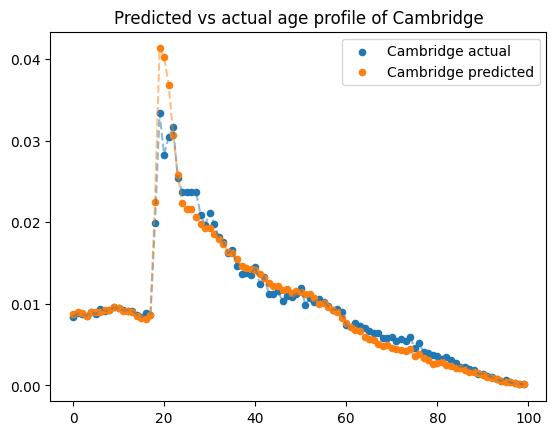

MSE: 3.198665170470961e-06


In [ ]:
predict_plot_city_ages('Cambridge', norm_student_population_df, norm_age_df)

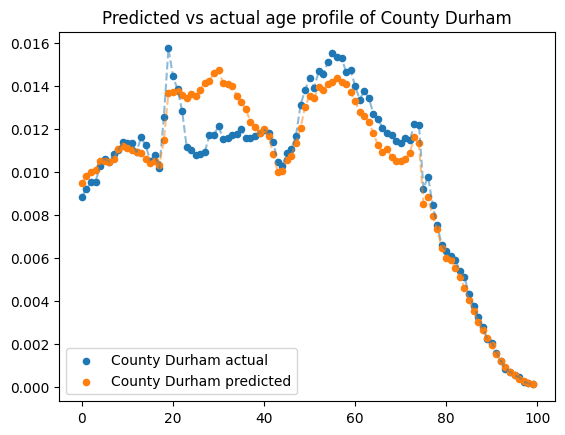

MSE: 1.21516241993048e-06


In [ ]:
predict_plot_city_ages('County Durham', norm_student_population_df, norm_age_df)

In [ ]:
norm_student_population_df.index

Index(['Adur', 'Allerdale', 'Amber Valley', 'Arun', 'Ashfield', 'Ashford',
       'Babergh', 'Barking and Dagenham', 'Barnet', 'Barnsley',
       ...
       'Woking', 'Wokingham', 'Wolverhampton', 'Worcester', 'Worthing',
       'Wrexham', 'Wychavon', 'Wyre', 'Wyre Forest', 'York'],
      dtype='object', name='geography', length=331)

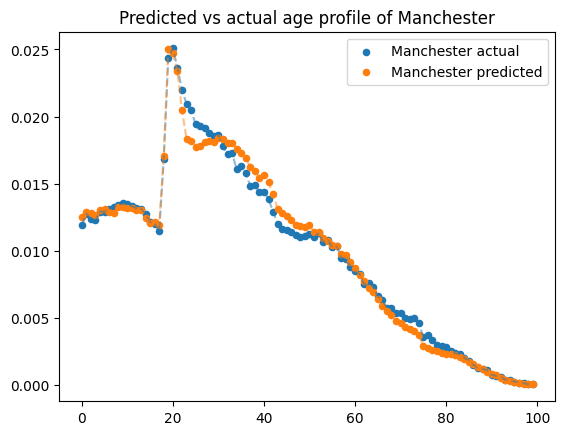

MSE: 5.355172404833337e-07


In [ ]:
predict_plot_city_ages('Manchester', norm_student_population_df, norm_age_df)

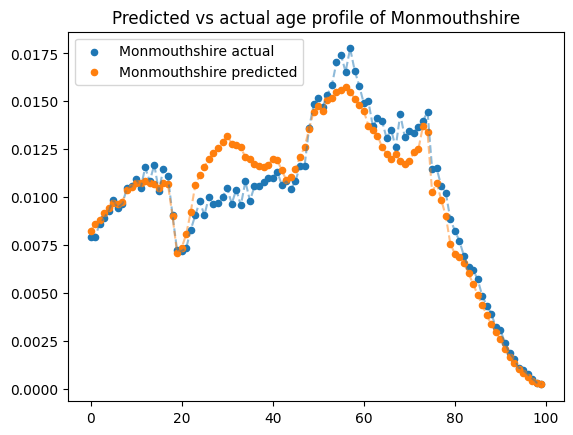

MSE: 1.360249701526481e-06


In [ ]:
predict_plot_city_ages('Monmouthshire', norm_student_population_df, norm_age_df)


## Conclusions

This has been quite a short introduction to a set of very useful models.
We have cut quite a few corners theoretically but importantly this is
something that we have to do when working as data-scientist. We need to
be able to apply models while there is still some uncertainty in how
they work and be able to translate this uncertainty to how we interpret
the results that we get. You are by no means expected to be experts on
GLMs at all but you should be able to use them. The next part of your
challenge is now to include the models that we have built up and use
them in the coursework. Try to first visualise the data, make a clear
narrative of why you are selecting a specific model and try to use the
tools that we derived her in order to provide context to the predictions
that you make. The statsmodel package gives you a rich set of tools that
you should be able to include directly into your project. Importantly,
remember that the most important thing is to be able to say why a model
does what it does not necessarily choosing the right model. During the
lecture Neil mentioned the idea that what separates statisticians from
machine learners is that the former cares about β while the machine
learners cares about $\hat{y}$ (the predictions). If you look at the
statmodels package this concept becomes very clear. Using the GLM code
as we did in the first exercise doesn’t actually provide us with the
uncertainty in the predictions only in the parameters. It was because of
this we changed from the GLM model class to OLS when using the basis
functions.

## Thanks!

For more information on these subjects and more you might want to check
the following resources.

-   book: [The Atomic
    Human](https://www.penguin.co.uk/books/455130/the-atomic-human-by-lawrence-neil-d/9780241625248)
-   twitter: [@lawrennd](https://twitter.com/lawrennd)
-   podcast: [The Talking Machines](http://thetalkingmachines.com)
-   newspaper: [Guardian Profile
    Page](http://www.theguardian.com/profile/neil-lawrence)
-   blog:
    [http://inverseprobability.com](http://inverseprobability.com/blog.html)

## References

-   McCullagh, P., & Nelder, J. A. (1989). *Generalized Linear Models*.
    London, UK: Chapman Hall / CRC.

-   Rasmussen, Carl Edward, & Williams, Christopher K. I. (2006).
    *Gaussian Processes for Machine Learning* (Adaptive Computation and
    Machine Learning). The MIT Press.

-   Silverman, B. W. (1985). “Some Aspects of the Spline Smoothing
    Approach To Non-Parametric Regression Curve Fitting”. *Journal of
    the Royal Statistical Society: Series B (Methodological)*, 47(1),
    pp. 1–21.

-   Vapnik, Vladimir N. (1999). *The Nature of Statistical Learning
    Theory*.